In [39]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
#start with y =mx+c
x = np.linspace(-4,4,5)
y=2*x+12
print(x)
print(y)

[-4. -2.  0.  2.  4.]
[ 4.  8. 12. 16. 20.]


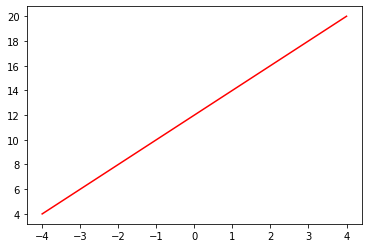

In [36]:
plt.plot(x, y, '-r', label='y=2x+1')

In [52]:
#Basic with linear regression:
data=pd.read_csv('tesla.csv')

In [59]:
close=data['Close']
open=data['Open']

Text(0.5, 1.0, 'Tesla Open close')

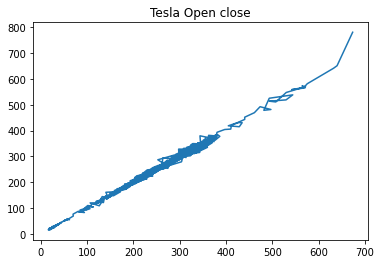

In [60]:
plt.plot(open,close,scalex=True, scaley=True)
plt.title("Tesla Open close")

In [68]:
close_mean=np.mean(close)
open_mean=np.mean(open)

In [170]:
#for y=mx+c need to calculate m and x
np.polyfit(open,close,1)

array([ 1.00221605, -0.28028231])

In [171]:
#formaula (x-x_mean)(y-y_mean)/(x-x_mean) raised 2
def factor(open,open_mean,close,close_mean):
    numerator = 0
    denominator = 0
    for i in range(len(close)):
        numerator += (open[i]-open_mean)*(close[i]-close_mean)
        denominator +=(open[i]-open_mean)**2
    b1=numerator/denominator;
    b0=close_mean-(b1*open_mean)
    return b0,b1
    

In [172]:
m,c=np.polyfit(open,close,1)
c,m

(-0.2802823123903707, 1.0022160517161671)

In [194]:
##now we can predict close price Y=MX+C
close_predicted =[]
for i in range(len(open)):
    close_predicted.append(m*c+open[i])

In [196]:
pd.DataFrame(close_predicted,close)

,0
Close,
23.889999,18.719097
23.830000,25.509098
21.959999,24.719097
19.200001,22.719097
16.110001,19.719097
...,...
566.900024,568.209087
580.989990,575.409099
640.809998,632.139080


No handles with labels found to put in legend.


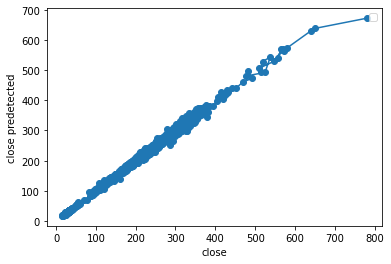

In [201]:
plt.plot(close,close_predicted)
plt.scatter(close,close_predicted)
plt.xlabel('close')
plt.ylabel('close predetected')
plt.legend()
plt.show()

In [206]:
result=pd.DataFrame()
result['close']=close
result['close_predicted']=close_predicted

In [207]:
result

,close,close_predicted
0,23.889999,18.719097
1,23.830000,25.509098
2,21.959999,24.719097
3,19.200001,22.719097
4,16.110001,19.719097
...,...,...
2411,566.900024,568.209087
2412,580.989990,575.409099
2413,640.809998,632.139080
2414,650.570007,639.719097


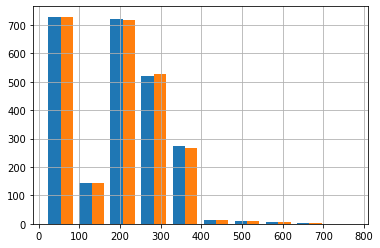

In [213]:
plt.hist([close,close_predicted])
plt.yscale('linear')
plt.grid(True)

In [216]:
pd.DataFrame(result).to_csv('predected_data.csv')

ModuleNotFoundError: No module named 'pyramid'

In [2]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('NSE-TATAGLOBAL11.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
#Arima
from pyramid.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

ModuleNotFoundError: No module named 'pyramid'

In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.
